In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
name = '^NSEBANK'
ticker = yf.Ticker(name)
df = ticker.history(interval="1d",start="2020-03-15", end="2020-07-15")
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)
df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
df

,Date,Open,High,Low,Close
Date,,,,,
2020-03-16,737500.0,24061.599609,24074.150391,23008.250000,23101.150391
2020-03-17,737501.0,23348.050781,23449.500000,22002.000000,22155.150391
2020-03-18,737502.0,22411.849609,22544.050781,20267.949219,20580.199219
2020-03-19,737503.0,19428.949219,21035.050781,18675.650391,20083.500000
2020-03-20,737504.0,19898.300781,20924.550781,19265.000000,20317.599609
...,...,...,...,...,...
2020-07-08,737614.0,22700.900391,23080.599609,22499.500000,22584.650391
2020-07-09,737615.0,22753.150391,22998.300781,22673.400391,22907.199219
2020-07-10,737616.0,22720.949219,22835.199219,22320.050781,22398.449219


In [2]:
import warnings
warnings.filterwarnings("ignore")
pp = []
pp_type = []
all_prices = df['Close']
for i in range(1, len(all_prices)-1):
    cur_price = all_prices[i]
    prev_price = all_prices[i-1]
    next_price = all_prices[i+1]
    if (next_price - cur_price)>0 and (cur_price - prev_price)<0:
        pp.append(cur_price)
        pp_type.append('support')
    elif (next_price - cur_price)<0 and (cur_price - prev_price)>0:
        pp.append(cur_price)
        pp_type.append('resistance')       
        
pp_df = pd.DataFrame(list(zip(pp, pp_type)), columns = ['Pivot Point','Nature'])
pp_df = pp_df.sort_values(by=['Pivot Point'])
pp_rtemp = pp_df[pp_df['Nature']=='resistance']
pp_stemp = pp_df[pp_df['Nature']=='support']

def id_reset(df):
    temp = []
    for i in range(len(df['Pivot Point'])):
        temp.append(i)
    df["Index"]=temp
    df.set_index('Index', inplace = True)
    return df

pp_res = id_reset(pp_rtemp)
pp_sup = id_reset(pp_stemp)
pp_res

,Pivot Point,Nature
Index,,
0,17840.199219,resistance
1,19062.500000,resistance
2,19144.000000,resistance
3,19634.949219,resistance
4,19694.550781,resistance
...,...,...
69,35938.300781,resistance
70,36056.500000,resistance
71,36368.050781,resistance


In [19]:
def space_out(pp_df, width):
    final_pp = [pp_df['Pivot Point'][0]]
    final_nat = [pp_df['Nature'][0]]
    j = 0
    for i in range(len(pp_df['Pivot Point'])):
        cur_price = pp_df['Pivot Point'][i]
        stored_price = final_pp[j]
        if cur_price>(stored_price+2*width):
            final_pp.append(cur_price)
            final_nat.append(pp_df['Nature'][i])
            j=j+1
    final_df = pd.DataFrame(list(zip(final_pp, final_nat)), columns = ['Pivot Point','Nature'])
    return final_df

spc_pc = input('Enter the space you want between consecutive lines (NOT in price units) ')
width = float(spc_pc)/100*np.mean(pp)
final_res = space_out(pp_res, width)
final_sup = space_out(pp_sup, width)

Enter the space you want between consecutive lines (NOT in price units) 6


Enter the width you want around each line (NOT in price units) 0.01


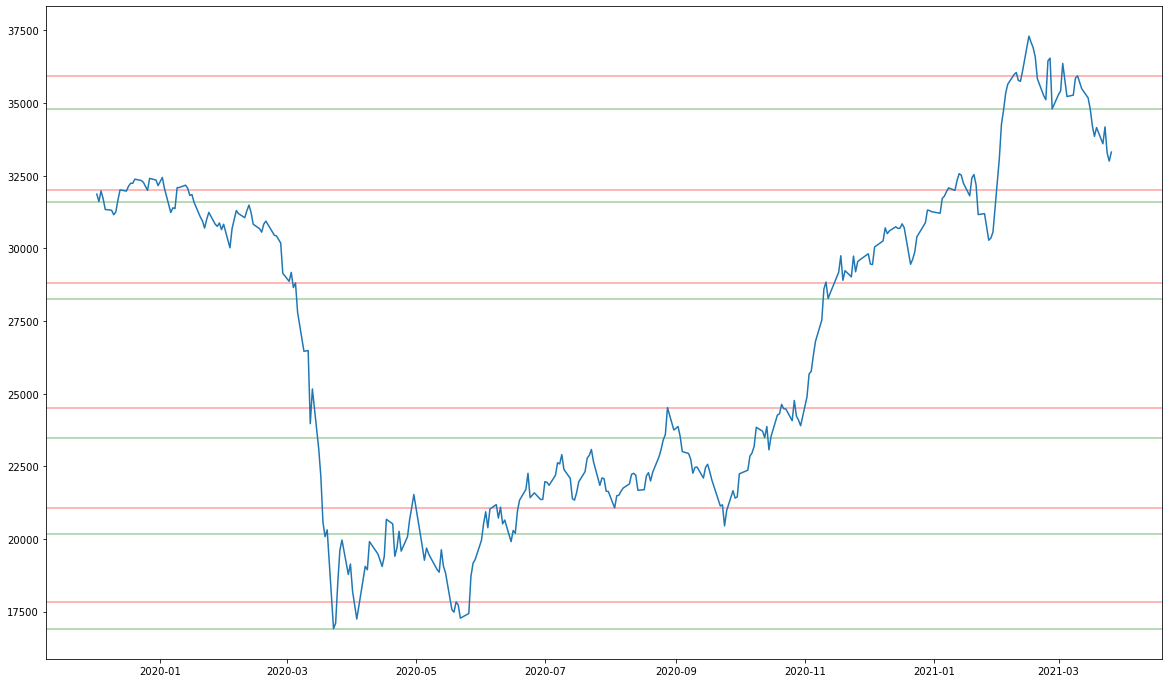

In [20]:
plt.rcParams["figure.figsize"] = (20,12)
plt.plot(df.index, df.Close)
f = input('Enter the width you want around each line (NOT in price units) ')
f = float(f)
def plotting(final_df, c):
    for i in range(len(final_df['Pivot Point'])):
        plt.axhspan(final_df['Pivot Point'][i]-f*width, final_df['Pivot Point'][i]+f*width, color=c, alpha=0.2)
    return None

plotting(final_res, 'red')
plotting(final_sup, 'green')